In [280]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import json 
import requests

In [281]:
h = requests.get('https://api.coinmarketcap.com/v1/ticker').json()
df = pd.DataFrame(h)

#convert to float  
df.market_cap_usd = df.market_cap_usd.astype(float)


#sort list by market cap
df = df.sort_values(by = "market_cap_usd", ascending = False)

#convert to dollar 
#df["market_cap_usd"] = "$"+(df["market_cap_usd"].astype(float)/1000000000).round(2).astype(str)+"B"

#narrow the list to top 10 
df = df.head(10)

#Two columns: ticker, market cap 
df = df.loc[:, "market_cap_usd":"name"]
df.drop("max_supply", axis = 1, inplace = True)

df["EURO Market Cap"] = df['market_cap_usd'] *0.89


df = df.rename(columns={"market_cap_usd":"USD Market Cap", "name":"Ticker", "EURO Market Cap":"EURO Market Cap"})

df = df.set_index('Ticker')

df

,USD Market Cap,EURO Market Cap
Ticker,,
Bitcoin,1.673156e+11,1.489109e+11
Ethereum,1.992235e+10,1.773089e+10
XRP,1.275592e+10,1.135277e+10
Bitcoin Cash,5.092904e+09,4.532685e+09
Tether,4.136428e+09,3.681421e+09
Litecoin,3.717764e+09,3.308810e+09
EOS,3.166041e+09,2.817777e+09
Binance Coin,3.134962e+09,2.790116e+09
Bitcoin SV,2.355030e+09,2.095977e+09


In [282]:
new_table = pd.DataFrame(h)


range = (new_table["market_cap_usd"].astype(float)>=100000000) & (new_table["market_cap_usd"].astype(float)<=200000000)

new_table = new_table.loc[range]
new_table = new_table.loc[:, "market_cap_usd":"name"]
new_table.drop("max_supply", axis = 1, inplace = True)

new_table = new_table.rename(columns={"market_cap_usd":"USD Market Cap Between 100M and 200M", "name":"Ticker"})

new_table = new_table.set_index('Ticker')
new_table


,USD Market Cap Between 100M and 200M
Ticker,
ThoreNext,186459887.0
Decred,186314493.0
TrueUSD,180825999.0
0x,178462952.0
ThoreCoin,152258894.0
Holo,147145892.0
Bitcoin Gold,144660958.0
ABBC Coin,141437203.0
Ravencoin,138937867.0


Text(0, 0.5, 'Normalized Value (Z-Score)')

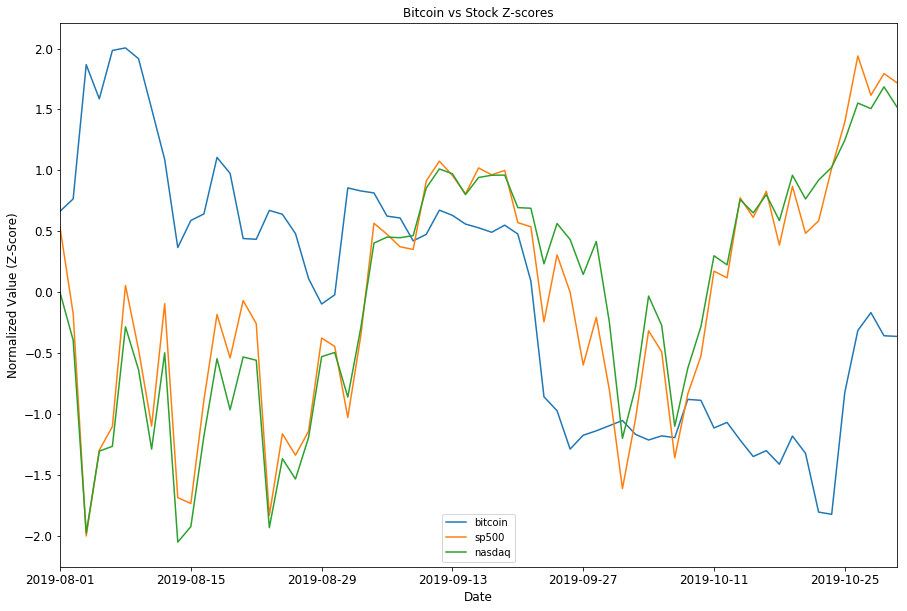

In [284]:
df_bitcoin = pd.read_csv("BTC-USD.csv")
df_sp500 = pd.read_csv("^IXIC.csv")
df_nasdaq = pd.read_csv("^GSPC.csv")
df_ftse = pd.read_csv("FTSE_DATA.csv")


df_bitcoin["bitcoin"] = (df_bitcoin["Close"]-df_bitcoin["Close"].mean())/df_bitcoin["Close"].std()
df_bitcoin.drop(["Open","High","Low","Adj Close","Volume","Close"], axis = 1, inplace= True)
df_bitcoin = df_bitcoin.set_index("Date")


df_sp500["sp500"] = (df_sp500["Close"]-df_sp500["Close"].mean())/df_sp500["Close"].std()
df_sp500.drop(["Open","High","Low","Adj Close","Volume","Close"], axis = 1, inplace= True)
df_sp500 = df_sp500.set_index("Date")

df_nasdaq["nasdaq"] = (df_nasdaq["Close"]-df_nasdaq["Close"].mean())/df_nasdaq["Close"].std()
df_nasdaq.drop(["Open","High","Low","Adj Close","Volume","Close"], axis = 1, inplace= True)


new_df = pd.merge(df_bitcoin, df_sp500, on="Date")
new_df = pd.merge(new_df, df_nasdaq, on="Date")

new_df = new_df.set_index("Date")
ax = new_df.plot(title = "Bitcoin vs Stock Z-scores",figsize=(15,10), legend=True,fontsize = 12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Normalized Value (Z-Score)",fontsize=12)

In [ ]:
'''This graph showcases the normalized z-score values of the stock market versus bitcoin prices in the past 90 days. 
As clearly shown, bitcoin values experience similar degrees of volatility as that of the stock market, but in 
complete opposite directions, indicating a strong negative correlation trend. Both Bitcoin and the stock market 
z-values have been ranging between -2 and 2. However, with recent drop in the bitcoin prices and rally in 
stock prices, one can observe surging volatilities in both asset classes. The perception that bitcoin prices 
are much riskier than stock market might not hold anymore.''' 